Apartado a)

theta_smax1= 36.86989764584402 º
theta_smax2= 126.86989764584402 º
sigma_x1 en theta= 36.86989764584402 º es: 110.000000000000  MPa
tau_x1y1 en theta= 36.86989764584402 º es: 1.77635683940025e-15  MPa
sigma_x1 en theta= 126.86989764584402 º es: 10.0000000000000  MPa
tau_x1y1 en theta= 126.86989764584402 º es: -1.95399252334028e-14  MPa

Apartado b)

theta_taumax1= 81.869897645844 º
theta_taumax2= 171.86989764584402 º
sigma_x1 en theta= 81.869897645844 º es: 60.0000000000000  MPa
tau_x1y1 en theta= 81.869897645844 º es: -50.0000000000000  MPa
sigma_x1 en theta= 171.86989764584402 º es: 60.0000000000000  MPa
tau_x1y1 en theta= 171.86989764584402 º es: 50.0000000000000  MPa

Comprobación
La diferencia entre angulos (1) es 44.999999999999986 º
La diferencia entre angulos (2) es 45.0 º
[[74 48]
 [48 46]]
Los valores propios de T son: 110.0  y  9.999999999999993
Los vectores propios son: [0.8 0.6] [-0.6  0.8]
El angulo principal 1 se puede calcular como arco coseno de v[0,0]: 36

Text(0, 0.5, 'tau_x1y1 (MPa)')

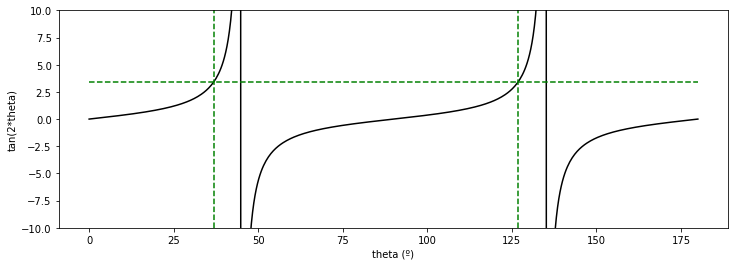

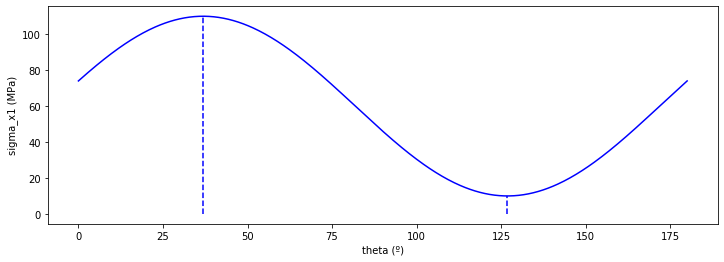

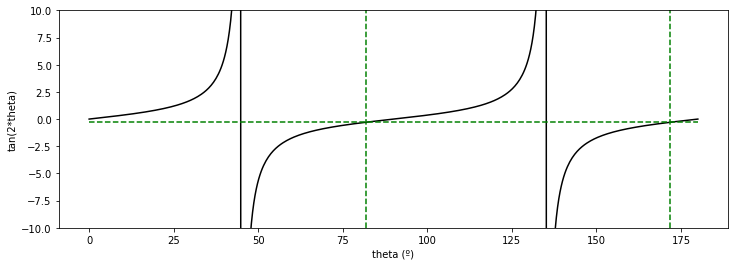

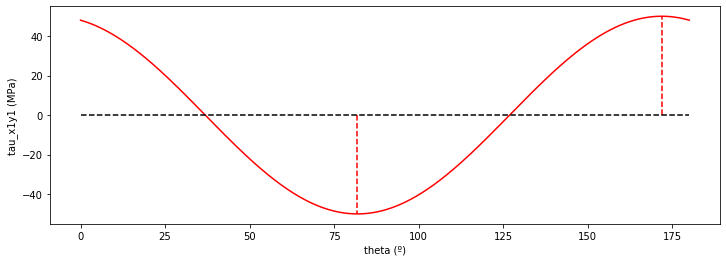

In [1]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from numpy import linalg as LA

x=symbols('x') 

s_x=74 #MPa
s_y=46
t_xy=48

angle=36.9
theta=angle*2*math.pi/360

def s_x1(theta):        
    return  0.5*(s_x+s_y)+0.5*(s_x-s_y)*cos(2*theta) + t_xy*sin(2*theta)

def t_x1y1(theta):        
    return  -0.5*(s_x-s_y)*sin(2*theta) + t_xy*cos(2*theta)

theta_smax1 =0.5*np.arctan(2*t_xy/(s_x-s_y))
theta_smax2 =theta_smax1 + math.pi/2

theta_taumax1 =0.5*np.arctan(-(s_x-s_y)/(2*t_xy))+math.pi/2
theta_taumax2 = theta_taumax1 + math.pi/2 


print("Apartado a)")
print("")
print("theta_smax1=", theta_smax1*360/(2*math.pi),"º")
print("theta_smax2=", theta_smax2*360/(2*math.pi),"º")
print("sigma_x1 en theta=",theta_smax1*360/(2*math.pi),"º es:", s_x1(theta_smax1), " MPa")
print("tau_x1y1 en theta=",theta_smax1*360/(2*math.pi),"º es:", t_x1y1(theta_smax1), " MPa")
print("sigma_x1 en theta=",theta_smax2*360/(2*math.pi),"º es:", s_x1(theta_smax2), " MPa")
print("tau_x1y1 en theta=",theta_smax2*360/(2*math.pi),"º es:", t_x1y1(theta_smax2), " MPa")
print("")


print("Apartado b)")
print("")
print("theta_taumax1=", theta_taumax1*360/(2*math.pi),"º")
print("theta_taumax2=", theta_taumax2*360/(2*math.pi),"º")
print("sigma_x1 en theta=",theta_taumax1*360/(2*math.pi),"º es:", s_x1(theta_taumax1), " MPa")
print("tau_x1y1 en theta=",theta_taumax1*360/(2*math.pi),"º es:", t_x1y1(theta_taumax1), " MPa")
print("sigma_x1 en theta=",theta_taumax2*360/(2*math.pi),"º es:", s_x1(theta_taumax2), " MPa")
print("tau_x1y1 en theta=",theta_taumax2*360/(2*math.pi),"º es:", t_x1y1(theta_taumax2), " MPa")
print("")

print("Comprobación")
print("La diferencia entre angulos (1) es", theta_taumax1*360/(2*math.pi)-theta_smax1*360/(2*math.pi),"º")
print("La diferencia entre angulos (2) es", theta_taumax2*360/(2*math.pi)-theta_smax2*360/(2*math.pi),"º")


T=np.array([[s_x, t_xy],
          [t_xy, s_y]])

s, v = LA.eig(T)

v1 = v[:,0]
v2 = v[:,1]

print(T)
print("Los valores propios de T son:",s[0]," y ",s[1])
print("Los vectores propios son:",v1,v2)

print("El angulo principal 1 se puede calcular como arco coseno de v[0,0]:",np.arccos(v[0,0])*360/(2*math.pi))
print("El angulo principal 1 se puede calcular como arco coseno de v[0,1]:",np.arccos(v[0,1])*360/(2*math.pi))




#plots

thetamin= -0 ; thetamax=180; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar\n",
tt=np.zeros((nopto,1))
tg=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = thetamin+i*(thetamax-thetamin)/(nopto-1) 
    angle, = yy[i]*2*math.pi/360
    ss[i]=s_x1(angle)
    tt[i]=t_x1y1(angle)
    tg[i]=np.tan(2*angle)

hmax=10
#grafica solucion tangente         
fig, ax1 = plt.subplots(figsize=(12, 4))  
ax1.plot(yy,tg, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
line1=2*t_xy/(s_x-s_y)
ax1.plot([thetamin, thetamax],[line1, line1], color="green",linestyle="--") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax1.plot([theta_smax1*360/(2*math.pi), theta_smax1*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.plot([theta_smax2*360/(2*math.pi), theta_smax2*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax1.set_ylabel("tan(2*theta)") # Nombre y unidades del eje y
ax1.set_ylim((-hmax, hmax))   # set the ylim to bottom, top

#sss
filename="Nombre de la función"
fig, ax = plt.subplots(figsize=(12, 4))   
                          
#ax.set_aspect('equal', adjustable='box')

ax.plot(yy,ss, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_smax1*360/(2*math.pi), theta_smax1*360/(2*math.pi)],[0, max(ss)], color="blue",linestyle="--")
ax.plot([theta_smax2*360/(2*math.pi), theta_smax2*360/(2*math.pi)],[0, min(ss)], color="blue",linestyle="--")
#ax.plot([10, 10],[50, 50], color="blue")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("sigma_x1 (MPa)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda


#grafica solucion tangente         
fig, ax1 = plt.subplots(figsize=(12, 4))  
ax1.plot(yy,tg, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
line1=-(s_x-s_y)/(2*t_xy)
ax1.plot([0, 180],[line1, line1], color="green",linestyle="--") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax1.plot([theta_taumax1*360/(2*math.pi), theta_taumax1*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.plot([theta_taumax2*360/(2*math.pi), theta_taumax2*360/(2*math.pi)],[-hmax, hmax], color="green",linestyle="--")
ax1.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax1.set_ylabel("tan(2*theta)") # Nombre y unidades del eje y
ax1.set_ylim((-hmax, hmax))   # set the ylim to bottom, top

filename="Nombre de la función"
fig, ax = plt.subplots(figsize=(12, 4))   
                          
#ax.set_aspect('equal', adjustable='box')

ax.plot(yy,tt, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot([theta_taumax1*360/(2*math.pi), theta_taumax1*360/(2*math.pi)],[0, min(tt)], color="red",linestyle="--")
ax.plot([theta_taumax2*360/(2*math.pi), theta_taumax2*360/(2*math.pi)],[0, max(tt)], color="red",linestyle="--")
ax.plot([thetamin, thetamax],[0, 0], color="black",linestyle="--")
ax.set_xlabel("theta (º)") # Nombre y unidades del eje x
ax.set_ylabel("tau_x1y1 (MPa)") # Nombre y unidades del eje y
